In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast
import cv2
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16,ResNet50


**1.Carga csv**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 7


In [2]:
file_path = 'C:/Users/andre/Downloads/csv_final_video7.csv'
df = pd.read_csv(file_path)

df.head()

filename  file_size file_attributes  region_count  region_id  \
0  surco-rouviere-244.jpg     102026              {}             3          0   
1  surco-rouviere-244.jpg     102026              {}             3          1   
2  surco-rouviere-244.jpg     102026              {}             3          2   
3  surco-rouviere-326.jpg     108379              {}             3          0   
4  surco-rouviere-326.jpg     108379              {}             3          1   

                             region_shape_attributes       region_attributes  
0  {"name":"rect","x":298,"y":192,"width":336,"he...   {"Region":"vesicula"}  
1  {"name":"rect","x":259,"y":367,"width":135,"he...      {"Region":"surco"}  
2  {"name":"rect","x":519,"y":55,"width":179,"hei...  {"Region":"segmento4"}  
3  {"name":"rect","x":298,"y":64,"width":233,"hei...   {"Region":"vesicula"}  
4  {"name":"rect","x":142,"y":250,"width":170,"he...      {"Region":"surco"}

In [3]:
# Asegurarnos de que la columna 'label' exista
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df[['filename', 'label']].head()

filename      label
0  surco-rouviere-244.jpg   vesicula
1  surco-rouviere-244.jpg      surco
2  surco-rouviere-244.jpg  segmento4
3  surco-rouviere-326.jpg   vesicula
4  surco-rouviere-326.jpg      surco

In [4]:
# Función para convertir las coordenadas del formato JSON a (x_min, y_min, x_max, y_max)
def convert_to_bounding_box(region_shape_attributes):
    shape_dict = ast.literal_eval(region_shape_attributes)
    x_min = shape_dict['x']
    y_min = shape_dict['y']
    x_max = x_min + shape_dict['width']
    y_max = y_min + shape_dict['height']
    return x_min, y_min, x_max, y_max

In [5]:


# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df['x_min'], df['y_min'], df['x_max'], df['y_max'] = zip(*df['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()

filename  x_min  y_min  x_max  y_max      label
0  surco-rouviere-244.jpg    298    192    634    426   vesicula
1  surco-rouviere-244.jpg    259    367    394    475      surco
2  surco-rouviere-244.jpg    519     55    698    210  segmento4
3  surco-rouviere-326.jpg    298     64    531    470   vesicula
4  surco-rouviere-326.jpg    142    250    312    420      surco

In [6]:
array_filename= df['filename'].unique()

In [7]:
array_filename.shape

(61,)

In [8]:
df.shape

(182, 12)

**Carga csv 2**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 2

In [9]:
file_path2 = './via_export_csv_final.csv'
df2 = pd.read_csv(file_path2)

df2.head()


filename  file_size file_attributes  region_count  region_id  \
0  frame_15090.jpg     115668              {}             3          0   
1  frame_15090.jpg     115668              {}             3          1   
2  frame_15090.jpg     115668              {}             3          2   
3  frame_15103.jpg     128711              {}             3          0   
4  frame_15103.jpg     128711              {}             3          1   

                             region_shape_attributes       region_attributes  
0  {"name":"rect","x":476,"y":138,"width":153,"he...   {"Region":"vesicula"}  
1  {"name":"rect","x":338,"y":277,"width":132,"he...      {"Region":"surco"}  
2  {"name":"rect","x":638,"y":234,"width":120,"he...  {"Region":"segmento4"}  
3  {"name":"rect","x":454,"y":145,"width":143,"he...   {"Region":"vesicula"}  
4  {"name":"rect","x":370,"y":305,"width":166,"he...      {"Region":"surco"}

In [10]:
# Asegurarnos de que la columna 'label' exista
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df2[['filename', 'label']].head()


filename      label
0  frame_15090.jpg   vesicula
1  frame_15090.jpg      surco
2  frame_15090.jpg  segmento4
3  frame_15103.jpg   vesicula
4  frame_15103.jpg      surco

In [11]:
# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df2['x_min'], df2['y_min'], df2['x_max'], df2['y_max'] = zip(*df2['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df2[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()


filename  x_min  y_min  x_max  y_max      label
0  frame_15090.jpg    476    138    629    475   vesicula
1  frame_15090.jpg    338    277    470    446      surco
2  frame_15090.jpg    638    234    758    382  segmento4
3  frame_15103.jpg    454    145    597    468   vesicula
4  frame_15103.jpg    370    305    536    439      surco

In [12]:
array_filename2= df2['filename'].unique()
array_filename2.shape

(835,)

In [13]:
df2.shape

(2505, 12)

In [14]:
merged_df = pd.concat([df, df2], ignore_index=True)
merged_df.head()

filename  file_size file_attributes  region_count  region_id  \
0  surco-rouviere-244.jpg     102026              {}             3          0   
1  surco-rouviere-244.jpg     102026              {}             3          1   
2  surco-rouviere-244.jpg     102026              {}             3          2   
3  surco-rouviere-326.jpg     108379              {}             3          0   
4  surco-rouviere-326.jpg     108379              {}             3          1   

                             region_shape_attributes       region_attributes  \
0  {"name":"rect","x":298,"y":192,"width":336,"he...   {"Region":"vesicula"}   
1  {"name":"rect","x":259,"y":367,"width":135,"he...      {"Region":"surco"}   
2  {"name":"rect","x":519,"y":55,"width":179,"hei...  {"Region":"segmento4"}   
3  {"name":"rect","x":298,"y":64,"width":233,"hei...   {"Region":"vesicula"}   
4  {"name":"rect","x":142,"y":250,"width":170,"he...      {"Region":"surco"}   

       label  x_min  y_min  x_max  y_max  
0   vesicula    298    192    634    426  
1      surco    259    367    394    475  
2  segmento4    519     55    698    210  
3   vesicula    298     64    531    470  
4      surco    142    250    312    420

In [15]:
merged_df.tail()

filename  file_size file_attributes  region_count  region_id  \
2682  frame_7775.jpg     105868              {}             3          1   
2683  frame_7775.jpg     105868              {}             3          2   
2684  frame_7786.jpg     103277              {}             3          0   
2685  frame_7786.jpg     103277              {}             3          1   
2686  frame_7786.jpg     103277              {}             3          2   

                                region_shape_attributes  \
2682  {"name":"rect","x":314,"y":334,"width":123,"he...   
2683  {"name":"rect","x":542,"y":222,"width":68,"hei...   
2684  {"name":"rect","x":372,"y":13,"width":132,"hei...   
2685  {"name":"rect","x":292,"y":321,"width":127,"he...   
2686  {"name":"rect","x":540,"y":240,"width":74,"hei...   

           region_attributes      label  x_min  y_min  x_max  y_max  
2682      {"Region":"surco"}      surco    314    334    437    402  
2683  {"Region":"segmento4"}  segmento4    542    222    610    293  
2684   {"Region":"vesicula"}   vesicula    372     13    504    325  
2685      {"Region":"surco"}      surco    292    321    419    407  
2686  {"Region":"segmento4"}  segmento4    540    240    614    295

In [16]:
merged_df.shape

(2687, 12)

In [17]:
print(len(merged_df['filename'].unique()))

896


**Cargar Imágenes**

In [18]:
import os

# Lista de los nombres de archivo que están en tu DataFrame
filenames_from_df = merged_df['filename'].unique()

# Directorio donde se encuentran las imágenes
image_directory = 'durante-cirugia'

# Obtener la lista de todos los archivos en el directorio
all_files_in_directory = os.listdir(image_directory)

# Filtrar los archivos que no están en el DataFrame
files_to_delete = [f for f in all_files_in_directory if f not in filenames_from_df]

# Eliminar los archivos que no están en el DataFrame
for file in files_to_delete:
    file_path = os.path.join(image_directory, file)
    if os.path.isfile(file_path):  # Verifica que sea un archivo y no un directorio
        os.remove(file_path)
        print(f"Archivo {file} eliminado.")
    else:
        print(f"{file} no es un archivo.")

print("Proceso de eliminación completado.")


Proceso de eliminación completado.


In [19]:
class_folders = [
        'antes-cirugia-grande',
        'durante-cirugia',
        'despues-cirugia-grande'
]

In [20]:
def ensure_directory_exists(directory):
    """
    Crea el directorio si no existe.
    
    Parámetros:
    -----------
    directory : str
        La ruta del directorio.
    """
    if not os.path.exists(directory):
        os.makedirs(directory)

In [21]:
def get_image_filenames(image_dirs):
    """
    Obtiene los nombres de los archivos de imagen .jpg de múltiples directorios.
    
    Parámetros:
    -----------
    image_dirs : list
        Lista de rutas de los directorios que contienen las imágenes.
        
    Retorno:
    --------
    list : Lista de nombres de archivos .jpg.
    """
    image_filenames = []
    for image_dir in image_dirs:
        image_filenames += [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    return image_filenames

**Procesamiento de la imágenes**

Se redimensionan a un tamaño de 224x224,se normalizan y adicionamente se obtienen las coordenadas de cada región de la imagen

In [22]:
def read_imageResize_with_labels(df, image_dirs, target_size=(224, 224)):
    """
    Lee imágenes de múltiples directorios, las redimensiona a 224x224 píxeles y las etiqueta según 
    los valores en el DataFrame. Las imágenes son procesadas en RGB.

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame que contiene la información de las imágenes y coordenadas.
    image_dirs : list
        Lista de rutas de los directorios que contienen las imágenes.
    target_size : tuple, opcional
        Tamaño al que se redimensionarán las imágenes. Por defecto es (224, 224).

    Retorno:
    --------
    tuple: 
        - np.array: Un array de NumPy con las imágenes redimensionadas.
        - dict: Un diccionario con los bounding boxes y las etiquetas correspondientes a las imágenes.
    """
    images_now = []
    bbox_targets = []
    class_targets = []

    # Obtener todos los nombres de archivo de las imágenes de los directorios especificados
    image_filenames = get_image_filenames(image_dirs)

    # Procesar cada imagen en la lista de archivos
    for name_image in image_filenames:
        # Obtener la ruta completa de la imagen
        image_path = None
        for image_dir in image_dirs:
            possible_path = os.path.join(image_dir, name_image)
            if os.path.exists(possible_path):
                image_path = possible_path
                break

        if image_path is None:
            print(f"Error: No se pudo encontrar la imagen {name_image}")
            continue

        # Leer y procesar la imagen
        image = cv2.imread(image_path)
        if image is None:
            print(f"Advertencia: No se pudo leer la imagen {image_path}")
            continue

        height, width = image.shape[:2]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
        image = image / 255.0

        # Buscar en el DataFrame las etiquetas correspondientes a esta imagen
        df_image = df[df['filename'] == name_image]

        # Verificar si hay regiones en la imagen
        if df_image.empty:
            # Imagen sin regiones: asignar etiquetas de una nueva clase "sin regiones" (ejemplo: clase 3)
            bboxes = [[0, 0, 0, 0] for _ in range(3)]
            labels = [3 for _ in range(3)]  
        else:
            # Imagen con regiones: procesar normalmente
            bboxes = []
            labels = []
            for _, row in df_image.iterrows():
                label_map = {'vesicula': 0, 'surco': 1, 'segmento4': 2}
                label = label_map.get(row['label'], 3)  # Clase especial "sin regiones" si no es válida
                x_scale = target_size[0] / width
                y_scale = target_size[1] / height

                x_min = row['x_min'] * x_scale
                y_min = row['y_min'] * y_scale
                x_max = row['x_max'] * x_scale
                y_max = row['y_max'] * y_scale

                bbox = [x_min, y_min, x_max, y_max]
                bboxes.append(bbox)
                labels.append(label)

            # Asegurarse de que cada imagen tenga 3 regiones, si no, rellenar con valores vacíos
            while len(bboxes) < 3:
                bboxes.append([0, 0, 0, 0])  # Cuadro delimitador vacío
                labels.append(3)  # Asignar clase especial "sin regiones"

        images_now.append(image)
        bbox_targets.append(bboxes)
        class_targets.append(tf.keras.utils.to_categorical(labels, num_classes=4))  # 4 clases ahora (0, 1, 2, 3)

    images_now = np.array(images_now)
    bbox_targets = np.array(bbox_targets)
    class_targets = np.array(class_targets)

    return images_now, {"bounding_box": bbox_targets, "class_label": class_targets}


In [23]:

images, targets = read_imageResize_with_labels(merged_df,image_dirs=class_folders)



In [24]:

print(f"Número de imágenes: {images.shape[0]}")
print(f"Tamaño de cada imagen: {images.shape[1:]}")

# Verificar las etiquetas
primera_llave = next(iter(targets))
primer_valor = targets[primera_llave]


Número de imágenes: 2900
Tamaño de cada imagen: (224, 224, 3)


In [25]:
print(type(images[0]))

<class 'numpy.ndarray'>


In [26]:
def inspect_random_targets(targets, num_items=5):
    """
    Inspecciona 'num_items' elementos aleatorios de targets para visualizar 
    los bounding boxes y las etiquetas de clase.
    
    Parámetros:
    ----------
    targets : dict
        Diccionario que contiene 'bounding_box' y 'class_label'.
    num_items : int, opcional
        Número de elementos a visualizar.
    """
    bounding_boxes = targets['bounding_box']
    class_labels = targets['class_label']
    

    random_indices = np.random.choice(len(bounding_boxes), num_items, replace=False)
    
    for i in random_indices:
        print(f"--- Imagen {i+1} ---")
        
        print(f"Bounding Boxes (imagen {i+1}):")
        for bbox in bounding_boxes[i]:
            print(f"x_min: {bbox[0]}, y_min: {bbox[1]}, x_max: {bbox[2]}, y_max: {bbox[3]}")
        
        print(f"Class Labels (imagen {i+1}):")
        for label in class_labels[i]:
            label_index = np.argmax(label)
            # Ajusta el nombre para la clase especial 3
            if label_index == 3:
                label_name = 'sin regiones'
            else:
                label_name = 'vesicula' if label_index == 0 else ('surco' if label_index == 1 else 'segmento4')
                
            print(f"Label: {label_index} ({label_name})")
        
        print("\n")


In [27]:

inspect_random_targets(targets, num_items=3)

--- Imagen 560 ---
Bounding Boxes (imagen 560):
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
Class Labels (imagen 560):
Label: 3 (sin regiones)
Label: 3 (sin regiones)
Label: 3 (sin regiones)


--- Imagen 1178 ---
Bounding Boxes (imagen 1178):
x_min: 81.57377049180329, y_min: 5.133333333333334, x_max: 143.7377049180328, y_max: 129.73333333333335
x_min: 109.9016393442623, y_min: 137.2, x_max: 154.49180327868854, y_max: 181.53333333333333
x_min: 135.8688524590164, y_min: 63.46666666666667, x_max: 186.49180327868854, y_max: 90.53333333333333
Class Labels (imagen 1178):
Label: 0 (vesicula)
Label: 1 (surco)
Label: 2 (segmento4)


--- Imagen 2384 ---
Bounding Boxes (imagen 2384):
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
Class Labels (imagen 2384):
Label: 3 (sin regiones)
Label: 3 (sin regiones)
Labe

In [28]:
import os
destination_directory = './durante-cirugia/' 
# Lista de imágenes en el directorio
images_in_directory = set(os.listdir(destination_directory))

# Lista de imágenes en el DataFrame
images_in_dataframe = set(merged_df['filename'].unique())

# Imágenes que están en el directorio pero no en el DataFrame
missing_in_dataframe = images_in_directory - images_in_dataframe

# Imágenes que están en el DataFrame pero no en el directorio
missing_in_directory = images_in_dataframe - images_in_directory

# Mostrar los resultados
print(f"Imágenes en el directorio pero no en el DataFrame: {len(missing_in_dataframe)}")


print(f"Imágenes en el DataFrame pero no en el directorio: {len(missing_in_directory)}")



Imágenes en el directorio pero no en el DataFrame: 0
Imágenes en el DataFrame pero no en el directorio: 0


In [29]:
print(images.shape)

(2900, 224, 224, 3)


In [30]:
def visualize_bounding_boxes(images, targets, num_images=5, columns=2):
    """
    Visualiza un número determinado de imágenes con sus correspondientes cuadros delimitadores
    y etiquetas de clase. No dibuja cuadros ni etiquetas si la clase es inválida (-1 o 3).

    Parámetros:
    -----------
    images : numpy.ndarray
        Array de imágenes.
    targets : dict
        Diccionario que contiene los cuadros delimitadores ('bounding_box') y etiquetas ('class_label').
    num_images : int, opcional
        Número de imágenes a visualizar.
    columns : int, opcional
        Número de columnas en la visualización de subplots.
    """

    
    random_indices = np.random.choice(len(images), num_images, replace=False)

    # Definir el número de filas en función del número de imágenes y columnas
    rows = (num_images + columns - 1) // columns

    # Crear subplots
    fig, axes = plt.subplots(rows, columns, figsize=(15, 5 * rows))
    axes = axes.flatten()  

    for idx, i in enumerate(random_indices):
        ax = axes[idx]
        ax.imshow(images[i])
        bbox_list = targets['bounding_box'][i]
        class_list = targets['class_label'][i]

        for bbox, class_label in zip(bbox_list, class_list):
            label = np.argmax(class_label)

            # Si la etiqueta es -1 o 3 (sin regiones), no dibujar cuadros
            if label == -1 or label == 3:
                continue  


            color = 'red' if label == 0 else ('blue' if label == 1 else 'green')
            label_name = 'vesicula' if label == 0 else ('surco' if label == 1 else 'segmento4')


            ax.add_patch(plt.Rectangle(
                (bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1],
                edgecolor=color, facecolor='none', linewidth=2))

            # Añadir el texto de la etiqueta
            ax.text(bbox[0], bbox[1] - 10, f"{label_name}", color=color, fontsize=12,
                    bbox=dict(facecolor='yellow', alpha=0.5))
        
        ax.axis('off')  

    # Eliminar los subplots vacíos si el número de imágenes es menor que los subplots creados
    for idx in range(num_images, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()



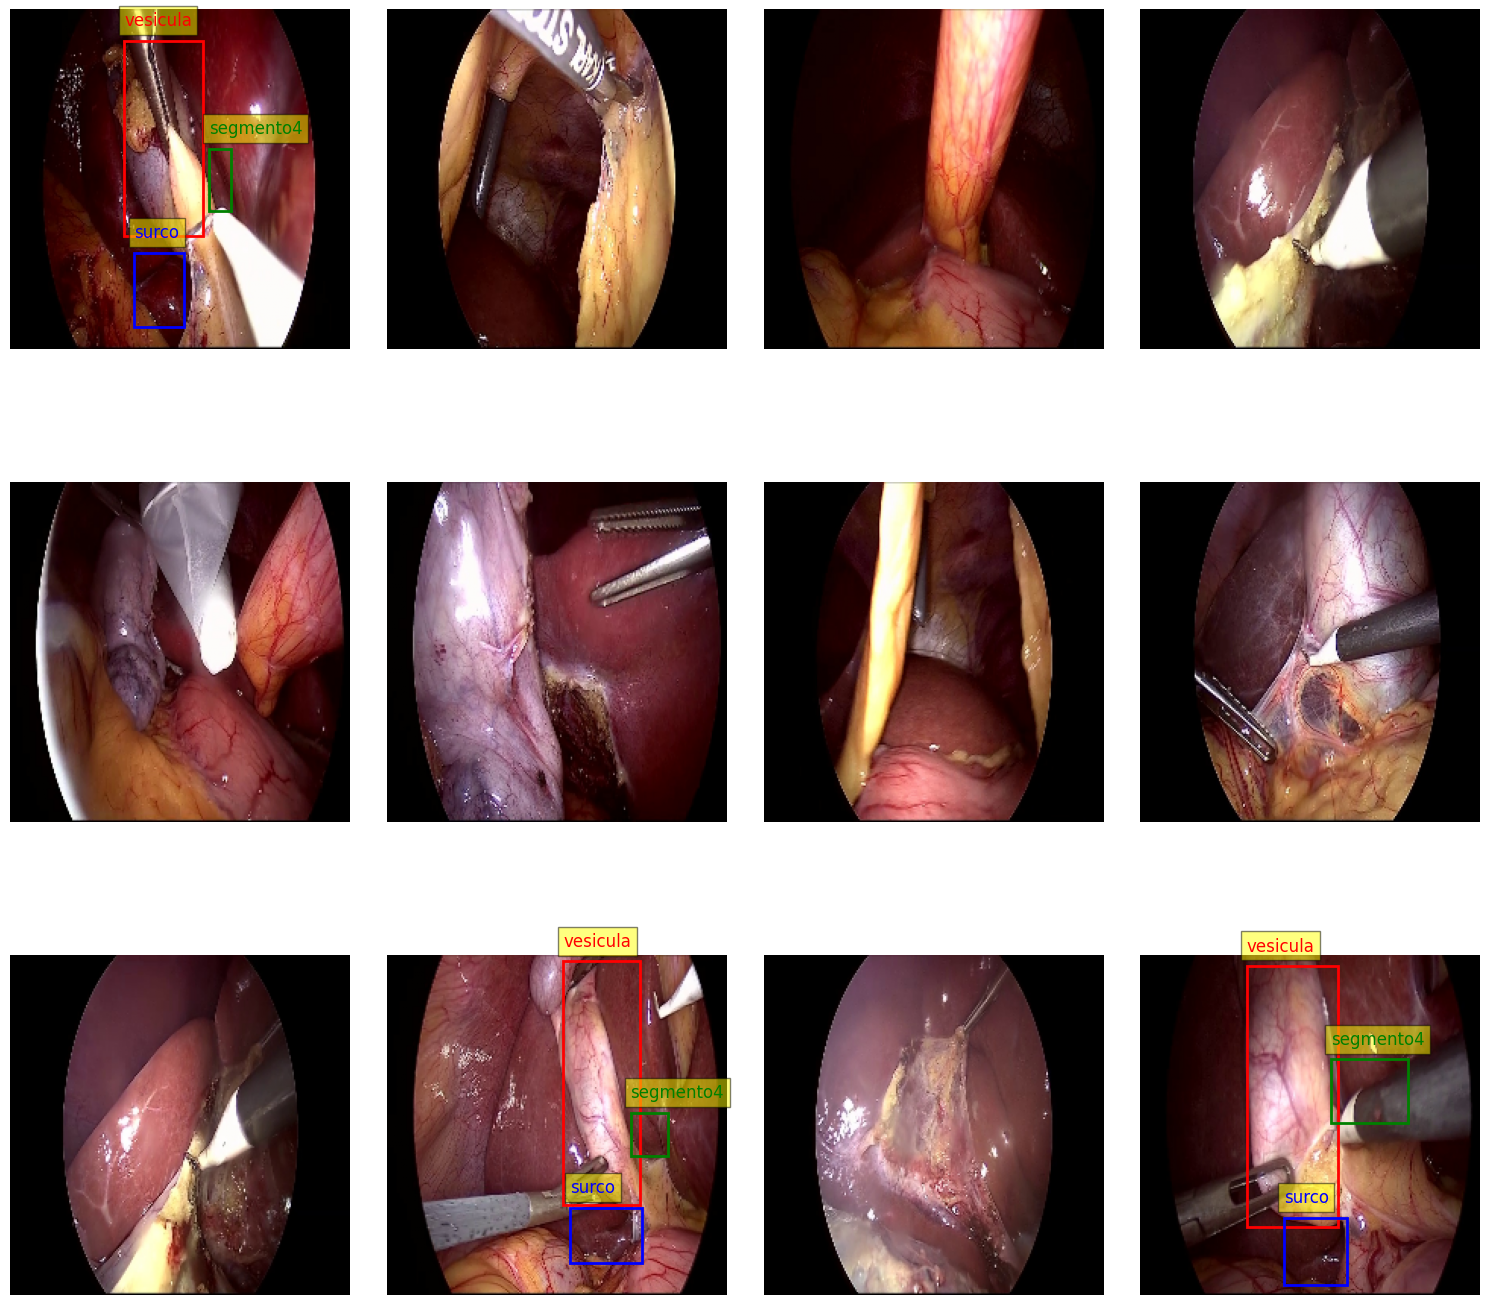

In [31]:
visualize_bounding_boxes(images, targets, num_images=12, columns=4)

**División train-test**

In [32]:
from sklearn.model_selection import train_test_split

# Suponiendo que 'images' es el array de imágenes y 'targets' es un diccionario con bounding boxes y class labels
bounding_boxes = targets['bounding_box']
class_labels = targets['class_label']


# División en 80% para entrenamiento y 20% para validación
X_train, X_val, bbox_train, bbox_val, class_train, class_val = train_test_split(
    images, bounding_boxes, class_labels, test_size=0.2, random_state=42
)

# Creamos diccionarios para los targets de entrenamiento y validación
train_targets = {
    'bounding_box': bbox_train,
    'class_label': class_labels
}

val_targets = {
    'bounding_box': bbox_val,
    'class_label': class_labels
}


print(f'Conjunto de entrenamiento: {len(X_train)} imágenes, {len(train_targets["bounding_box"])} bounding boxes')
print(f'Conjunto de validación: {len(X_val)} imágenes, {len(val_targets["bounding_box"])} bounding boxes')
print(f"Shape train {class_labels.shape}")

Conjunto de entrenamiento: 2320 imágenes, 2320 bounding boxes
Conjunto de validación: 580 imágenes, 580 bounding boxes
Shape train (2900, 3, 4)


In [33]:
np.array(train_targets['bounding_box']).shape


(2320, 3, 4)

In [34]:
np.array(val_targets['bounding_box']).shape

(580, 3, 4)

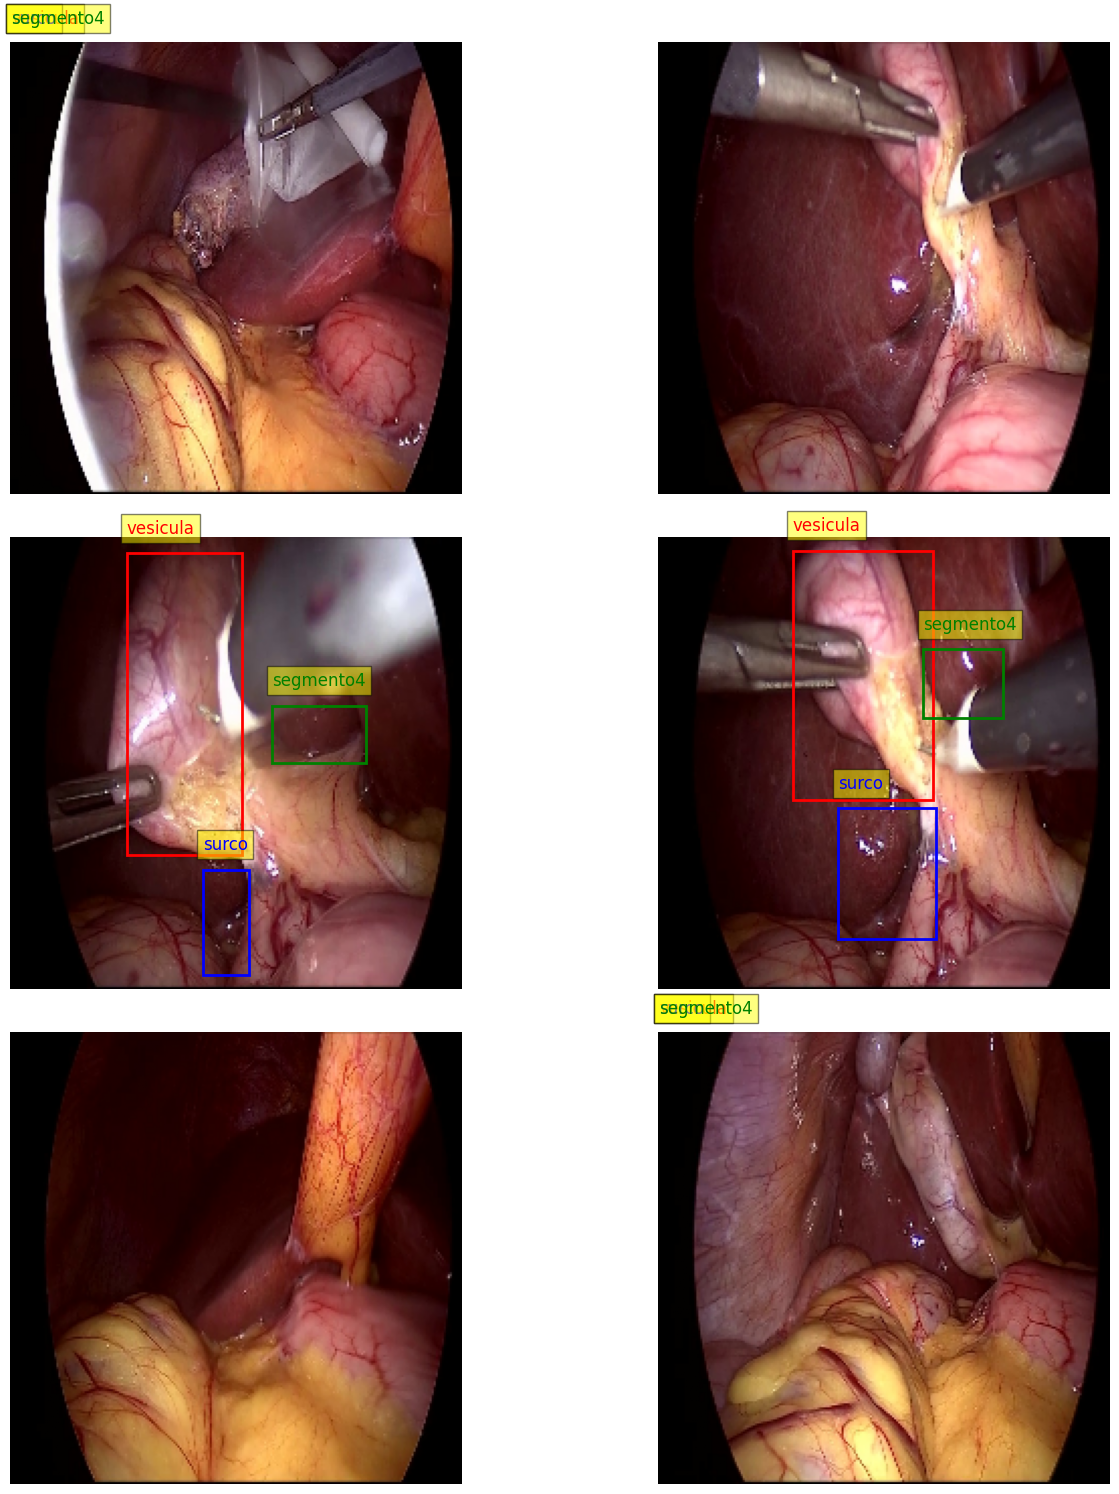

In [35]:
visualize_bounding_boxes(X_train,train_targets,6,2)

In [36]:
def normalize_bounding_boxes(bboxes, image_width, image_height):
    """
    Normaliza los bounding boxes para que estén en el rango [0, 1].
    
    Parámetros:
    -----------
    bboxes : np.array
        Array con los bounding boxes (x_min, y_min, x_max, y_max).
    image_width : int
        Ancho de la imagen.
    image_height : int
        Alto de la imagen.
        
    Retorno:
    --------
    np.array : Bounding boxes normalizados.
    """
    bboxes[:, :, [0, 2]] /= image_width  
    bboxes[:, :, [1, 3]] /= image_height  
    return bboxes


In [37]:

image_width = 224
image_height = 224

train_targets['bounding_box'] = normalize_bounding_boxes(train_targets['bounding_box'], image_width, image_height)


val_targets['bounding_box'] = normalize_bounding_boxes(val_targets['bounding_box'], image_width, image_height)


In [38]:
print(np.min(train_targets['bounding_box']), np.max(train_targets['bounding_box']))
print(np.min(val_targets['bounding_box']), np.max(val_targets['bounding_box']))


0.0 0.9979166666666667
0.0 1.0


In [39]:
train_targets['bounding_box'] = np.array(train_targets['bounding_box'])


val_targets['bounding_box'] = np.array(val_targets['bounding_box'])



**Resumen del modelo entrenado**

In [40]:
# Verificar que TensorFlow detecta la GPU
print("GPUs disponibles: ", tf.config.list_physical_devices('GPU'))


GPUs disponibles:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [41]:
import tensorflow as tf

def iou_metric(y_true, y_pred):
    def box_area(box):
        return tf.maximum(0.0, (box[..., 2] - box[..., 0])) * tf.maximum(0.0, (box[..., 3] - box[..., 1]))

    # Calcular las áreas de las cajas verdaderas y predichas
    true_area = box_area(y_true)
    pred_area = box_area(y_pred)

    # Calcular las coordenadas de intersección
    x_min = tf.maximum(y_true[..., 0], y_pred[..., 0])
    y_min = tf.maximum(y_true[..., 1], y_pred[..., 1])
    x_max = tf.minimum(y_true[..., 2], y_pred[..., 2])
    y_max = tf.minimum(y_true[..., 3], y_pred[..., 3])

    # Calcular el área de intersección
    intersection_area = tf.maximum(0.0, x_max - x_min) * tf.maximum(0.0, y_max - y_min)

    # Calcular el área de unión
    union_area = true_area + pred_area - intersection_area

    # Calcular IoU, asegurándonos de no dividir por cero
    iou = intersection_area / tf.maximum(union_area, 1e-10)

    # Devolver la media del IoU
    return tf.reduce_mean(iou)


In [42]:
def smooth_l1_loss(y_true, y_pred, delta=1.0):
    residual = tf.abs(y_true - y_pred)
    condition = tf.less(residual, delta)
    small_residual_loss = 0.5 * tf.square(residual)
    large_residual_loss = delta * residual - 0.5 * tf.square(delta)
    return tf.where(condition, small_residual_loss, large_residual_loss)


In [53]:
def ciou_loss(y_true, y_pred):
    # Obtener las coordenadas
    x_min_true, y_min_true, x_max_true, y_max_true = tf.split(y_true, 4, axis=-1)
    x_min_pred, y_min_pred, x_max_pred, y_max_pred = tf.split(y_pred, 4, axis=-1)

    # Calcular los centros y dimensiones de las cajas
    true_width = x_max_true - x_min_true
    true_height = y_max_true - y_min_true
    pred_width = x_max_pred - x_min_pred
    pred_height = y_max_pred - y_min_pred

    # Calcular IoU
    intersection_area = tf.maximum(0.0, tf.minimum(x_max_true, x_max_pred) - tf.maximum(x_min_true, x_min_pred)) * \
                        tf.maximum(0.0, tf.minimum(y_max_true, y_max_pred) - tf.maximum(y_min_true, y_min_pred))
    union_area = (true_width * true_height) + (pred_width * pred_height) - intersection_area
    iou = intersection_area / tf.maximum(union_area, 1e-10)

    # Calcular la distancia entre los centros
    center_true_x = (x_min_true + x_max_true) / 2
    center_true_y = (y_min_true + y_max_true) / 2
    center_pred_x = (x_min_pred + x_max_pred) / 2
    center_pred_y = (y_min_pred + y_max_pred) / 2
    center_distance = tf.square(center_true_x - center_pred_x) + tf.square(center_true_y - center_pred_y)

    # Calcular la diagonal del cuadro envolvente más pequeño
    enclose_x_min = tf.minimum(x_min_true, x_min_pred)
    enclose_y_min = tf.minimum(y_min_true, y_min_pred)
    enclose_x_max = tf.maximum(x_max_true, x_max_pred)
    enclose_y_max = tf.maximum(y_max_true, y_max_pred)
    enclose_diagonal = tf.square(enclose_x_max - enclose_x_min) + tf.square(enclose_y_max - enclose_y_min)

    # CIoU: IoU + distancia entre centros + penalización por relación de aspecto
    ciou = iou - (center_distance / tf.maximum(enclose_diagonal, 1e-10))

    return 1 - tf.reduce_mean(ciou)

In [43]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Add, Concatenate, UpSampling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Reshape, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def conv_block(x, filters, kernel_size=(3, 3), strides=(1, 1), use_residual=False):
    shortcut = x
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    
    if use_residual:
        shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)
        x = Add()([x, shortcut])
    
    return x

def dilated_block(x, filters, dilation_rate=2):
    x = Conv2D(filters, (3, 3), padding='same', dilation_rate=dilation_rate)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    return x

In [55]:
def create_custom_detection_model(input_shape=(224, 224, 3), num_bboxes=3):
    image_input = Input(shape=input_shape, name='image_input')

    # Bloques convolucionales iniciales
    x = conv_block(image_input, 32)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Aumentar la profundidad de la red
    x = conv_block(x, 64, use_residual=True)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = conv_block(x, 128, use_residual=True)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Añadir más bloques dilatados para capturar más información espacial
    x = dilated_block(x, 256, dilation_rate=2)
    x = conv_block(x, 256, use_residual=True)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Bloques adicionales
    x = conv_block(x, 512, use_residual=True)
    x = dilated_block(x, 512, dilation_rate=4)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Aplanar para pasar a capas densas
    x = Flatten()(x)

    # Capa completamente conectada
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Capa de salida para los bounding boxes
    bounding_box = Dense(num_bboxes * 4, activation='sigmoid')(x)
    bounding_box = Reshape((num_bboxes, 4), name='bounding_box')(bounding_box)

    # Crear el modelo
    model = Model(inputs=image_input, outputs=[bounding_box])

    # Compilar el modelo usando una combinación de pérdidas
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss={'bounding_box': ciou_loss},
                  metrics={'bounding_box': [iou_metric,'mse']})

    model.summary()
    return model



In [56]:
model = create_custom_detection_model()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image_input (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_11 (Conv2D)             (None, 224, 224, 32  896         ['image_input[0][0]']            
                                )                                                                 
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 224, 224, 32  128        ['conv2d_11[0][0]']              
 rmalization)                   )                                                           

In [57]:
print(model.output_names)

['bounding_box']


In [58]:
# Entrenar el modelo
history = model.fit(
    X_train,  
    train_targets['bounding_box'],  
    validation_data=(X_val, val_targets['bounding_box']),  
    epochs=20,  
    batch_size=32  
)

Epoch 1/100
73/73 [==============================] - 14s 161ms/step - loss: 1.1652 - iou_metric: 0.0232 - mse: 0.3967 - val_loss: 1.1552 - val_iou_metric: 0.0241 - val_mse: 0.3956
Epoch 2/100
73/73 [==============================] - 11s 153ms/step - loss: 1.1581 - iou_metric: 0.0234 - mse: 0.3987 - val_loss: 1.1552 - val_iou_metric: 0.0241 - val_mse: 0.3956
Epoch 3/100
73/73 [==============================] - 11s 153ms/step - loss: 1.1581 - iou_metric: 0.0236 - mse: 0.3987 - val_loss: 1.1552 - val_iou_metric: 0.0241 - val_mse: 0.3956
Epoch 4/100
73/73 [==============================] - 11s 154ms/step - loss: 1.1581 - iou_metric: 0.0235 - mse: 0.3987 - val_loss: 1.1552 - val_iou_metric: 0.0241 - val_mse: 0.3956
Epoch 5/100
73/73 [==============================] - 12s 169ms/step - loss: 1.1581 - iou_metric: 0.0234 - mse: 0.3987 - val_loss: 1.1552 - val_iou_metric: 0.0241 - val_mse: 0.3956
Epoch 6/100
73/73 [==============================] - 11s 152ms/step - loss: 1.1581 - iou_metric: 0.0

KeyboardInterrupt: 

In [48]:
# Evaluar el modelo en el conjunto de validación
evaluation_results = model.evaluate(
    X_val,  # Imágenes de validación
    val_targets['bounding_box'],  # Bounding boxes de validación
    batch_size=32  # Tamaño del batch
)

# Imprimir las métricas
print(f"Resultados de la evaluación: {model.metrics_names}")
print(f"Valores de evaluación: {evaluation_results}")


19/19 [==============================] - 1s 47ms/step - loss: 0.0021 - iou_metric: 0.2043 - mse: 0.0042
Resultados de la evaluación: ['loss', 'iou_metric', 'mse']
Valores de evaluación: [0.0021006350871175528, 0.20433199405670166, 0.004201269242912531]


In [49]:
# Realizar predicciones en el conjunto de validación
pred_bboxes = model.predict(X_val)

# Imprimir algunas predicciones y las etiquetas verdaderas
print("Predicciones de bounding boxes para la primera imagen:")
print(pred_bboxes[12])  # Bounding boxes predichos para la primera imagen

print("Bounding boxes verdaderos para la primera imagen:")
print(val_targets['bounding_box'][12])  # Bounding boxes verdaderos para la primera imagen


19/19 [==============================] - 1s 45ms/step
Predicciones de bounding boxes para la primera imagen:
[[0.34805787 0.0052043  0.6140364  0.6218611 ]
 [0.42343295 0.6537033  0.60006976 0.8406483 ]
 [0.63884974 0.2835791  0.8411923  0.46667385]]
Bounding boxes verdaderos para la primera imagen:
[[0.36885246 0.03125    0.60187354 0.59791667]
 [0.42271663 0.6625     0.60772834 0.82916667]
 [0.63583138 0.34166667 0.84543326 0.47083333]]


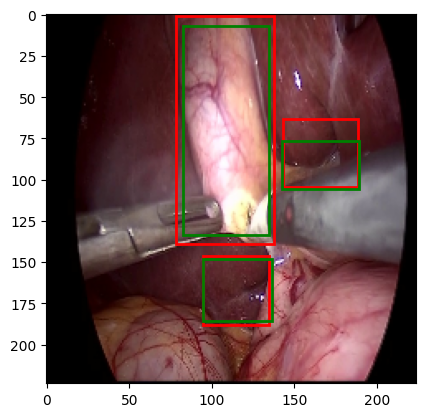

In [64]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Dimensiones de la imagen
image_size = 224

# Selecciona la imagen de validación
img = X_val[12]

# Bounding boxes predichos y verdaderos
pred_box = pred_bboxes[12]
true_box = val_targets['bounding_box'][12]

# Crear la figura y los ejes
fig, ax = plt.subplots(1)
ax.imshow(img)

# Reescalar las coordenadas de los cuadros predichos y verdaderos
pred_box_scaled = pred_box * image_size
true_box_scaled = true_box * image_size

# Añadir las cajas predichas (en rojo)
for box in pred_box_scaled:
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# Añadir las cajas verdaderas (en verde)
for box in true_box_scaled:
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='g', facecolor='none')
    ax.add_patch(rect)

# Mostrar la imagen con las cajas
plt.show()



In [50]:
val_targets['bounding_box'][12]

array([[0.36885246, 0.03125   , 0.60187354, 0.59791667],
       [0.42271663, 0.6625    , 0.60772834, 0.82916667],
       [0.63583138, 0.34166667, 0.84543326, 0.47083333]])

In [51]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Función para denormalizar las coordenadas del bounding box si están entre [0, 1]
def denormalize_bboxes(bboxes, image_shape):
    h, w = image_shape[:2]
    denorm_bboxes = []
    for bbox in bboxes:
        x_min = int(bbox[0] * w)
        y_min = int(bbox[1] * h)
        x_max = int(bbox[2] * w)
        y_max = int(bbox[3] * h)
        denorm_bboxes.append([x_min, y_min, x_max, y_max])
    return denorm_bboxes




In [52]:
# Función para dibujar bounding boxes en una imagen
def draw_bboxes(image, bboxes, color=(255, 0, 0), thickness=2):
    for bbox in bboxes:
        x_min, y_min, x_max, y_max = bbox
        image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
    return image